<a href="https://colab.research.google.com/github/aludaiyaarasu/Mytest/blob/master/Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install sklearn

In [ ]:
pip install category_encoders

     |████████████████████████████████| 81kB 2.3MB/s 


In [ ]:
original_dataset = pd.read_csv('/content/sample_data/trans.csv',delimiter=',',header=0)

In [ ]:
original_dataset.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [ ]:
def label_class(row):
    if row['PPI_SINGLE'] == 1:
        return 'single'
    if row['PPI_JOINT'] == 1:
        return 'joint'
    if row['PPI_LCI'] == 1:
        return 'lci'

In [ ]:
original_dataset['class'] = original_dataset.apply (lambda row: label_class(row), axis=1)

KeyError: ignored

In [ ]:
drop_columns =['Insurance_Description','code','prdt_desc','category','PPI_SINGLE','PPI_JOINT','PPI_LCI']
original_dataset.drop(drop_columns,inplace=True,axis=1)

In [ ]:
data_preprocessced = original_dataset

In [ ]:
data_ready_for_pipeline_train_test = data_preprocessced[data_preprocessced['PPI'].isin(['1'])]
data_ready_for_pipeline_scoring = data_preprocessced[data_preprocessced['PPI'].isin(['0'])]

In [ ]:
data_ready_for_pipeline_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9461 entries, 1 to 16381
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               9461 non-null   int64  
 1   Credit_Score                      9461 non-null   int64  
 2   Final_Grade                       9461 non-null   object 
 3   Term                              9461 non-null   int64  
 4   Net_Advance                       9461 non-null   float64
 5   APR                               9461 non-null   float64
 6   Loan_Type                         9461 non-null   object 
 7   Mosaic                            9461 non-null   int64  
 8   Mosaic_Class                      9461 non-null   int64  
 9   Time_at_Address                   9461 non-null   int64  
 10  Residential_Status                9461 non-null   object 
 11  Telephone_Indicator               9461 non-null   object 
 12  Numbe

In [ ]:
drop_columns_for_pipeline=['PPI']

In [ ]:
data_ready_for_pipeline_scoring.drop(columns=['class'])

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,Residential_Status,Telephone_Indicator,Number_of_Dependants,Marital_Status,Gender,Time_in_Employment,Employment_Status,Full_Part_Time_Empl_Ind,Perm_Temp_Empl_Ind,Income_Range,Current_Account,ACCESS_Card,VISA_Card,American_Express,Diners_Card,Cheque_Guarantee,Other_Credit_Store_Card,Time_with_Bank,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Bureau_Data___Monthly_Other_Co_R,Worst_History_CT,Payment_Method,Age,Total_outstanding_balance__mortg,Total___Public_Info___CCJ____ban,Total_value__Public_Info___CCJ__,Time_since_most_recent_Public_In,Total_value__CAIS_8_9s,Worst_status_L6m,Worst_CUrrent_Status,__of_status_3_s_L6m,Searches___Total___L6m,Years_on_ER_for_SP,Bankruptcy_Detected__SP_,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,CIFAS_detected,Time_since_most_recent_outstandi,PPI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,H,Y,0,M,M,288,S,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,168,178000,47679,64406,513,5,D,46,64,1,5,16,0,0,0,0,9,10,N,1,18,6,N,16,0
7,10,961,X,60,5300.0,11.9,secured,43,7,163,H,N,2,M,M,351,P,F,P,6,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,243,92000,73386,84624,800,0,D,49,75,4,96,7,175,0,0,0,6,8,N,4,113,8,N,7,0
10,17,840,B,120,10150.0,12.4,secured,24,4,37,H,Y,2,M,M,58,P,F,P,6,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,261,110000,97253,109231,706,4,D,27,99,0,0,99,27,0,0,0,4,3,N,0,120,7,N,99,0
14,24,896,A,37,5000.0,9.4,UnSecured,15,3,4,H,Y,0,D,M,240,P,F,P,5,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,300,246000,127983,257560,1526,5,D,48,257,0,0,99,0,0,0,0,3,20,N,0,16,9,N,99,0
23,44,966,X,48,8000.0,7.9,UnSecured,24,4,156,H,Y,3,D,F,81,P,F,P,3,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,168,85000,38650,39908,282,0,D,34,40,0,0,99,0,0,0,0,0,13,N,0,13,6,N,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,42060,922,A,60,1500.0,19.9,UnSecured,46,8,420,L,Y,0,S,F,78,P,F,P,2,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,336,120000,0,787,10,0,D,36,0,0,0,99,0,1,0,0,2,3,N,0,8,9,N,99,0
16377,42064,915,A,36,1000.0,21.9,UnSecured,47,8,179,H,Y,2,M,F,108,S,F,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,FALS,FALSE,120,110000,25000,29736,360,0,D,38,30,0,0,99,0,0,0,0,0,9,N,0,17,6,N,99,0
16378,42067,952,X,60,5000.0,8.9,UnSecured,59,11,193,H,Y,0,S,F,57,P,F,P,2,TRUE,FALSE,TRUE,FALSE,FALSE,FALS,TRUE,225,465000,230000,239597,1150,0,D,46,237,0,0,99,0,1,0,0,0,0,N,0,43,5,N,99,0
16379,42068,922,A,60,7500.0,7.9,UnSecured,55,10,1,H,Y,0,S,M,36,P,F,P,4,TRUE,TRUE,TRUE,FALSE,FALSE,FALS,FALSE,240,135000,122085,127002,639,4,D,32,124,0,0,99,0,0,0,0,2,0,N,0,50,8,N,99,0


In [ ]:
product_map_status={'lci':1,'single':2,'joint':3}
data_ready_for_pipeline_train_test['class'] = data_ready_for_pipeline_train_test['class'].map(product_map_status)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
y = data_ready_for_pipeline_train_test.pop('class')

In [ ]:
X = data_ready_for_pipeline_train_test

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9461 entries, 1 to 16381
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               9461 non-null   int64  
 1   Credit_Score                      9461 non-null   int64  
 2   Final_Grade                       9461 non-null   object 
 3   Term                              9461 non-null   int64  
 4   Net_Advance                       9461 non-null   float64
 5   APR                               9461 non-null   float64
 6   Loan_Type                         9461 non-null   object 
 7   Mosaic                            9461 non-null   int64  
 8   Mosaic_Class                      9461 non-null   int64  
 9   Time_at_Address                   9461 non-null   int64  
 10  Residential_Status                9461 non-null   object 
 11  Telephone_Indicator               9461 non-null   object 
 12  Numbe

In [ ]:
num_vars =['Credit_Score','Term','Net_Advance','APR','Mosaic','Time_at_Address','Number_of_Dependants','Time_in_Employment','Time_with_Bank','Outstanding_Mortgage_Bal','Total_Outstanding_Balances','Bureau_Data___Monthly_Other_Co_R','Age','Total_outstanding_balance__mortg','Total_value__Public_Info___CCJ__','Time_since_most_recent_Public_In','Total_value__CAIS_8_9s','Searches___Total___L6m','Years_on_ER_for_SP','Total_outstanding_balance___excl','Total___of_accounts','Time_since_most_recent_outstandi']
cat_vars=['Final_Grade','Loan_Type','Mosaic_Class','Residential_Status','Telephone_Indicator','Marital_Status','Gender','Employment_Status','Full_Part_Time_Empl_Ind','Perm_Temp_Empl_Ind','Income_Range','Current_Account','ACCESS_Card','VISA_Card','American_Express','Diners_Card','Cheque_Guarantee','Other_Credit_Store_Card','Worst_History_CT','Payment_Method','Total___Public_Info___CCJ____ban','Worst_status_L6m','Worst_CUrrent_Status','__of_status_3_s_L6m','Bankruptcy_Detected__SP_','Total___outstanding_CCJ_s','CIFAS_detected']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 50)

In [ ]:
X_train.dtypes

Ref                                   int64
Credit_Score                          int64
Final_Grade                          object
Term                                  int64
Net_Advance                         float64
APR                                 float64
Loan_Type                            object
Mosaic                                int64
Mosaic_Class                          int64
Time_at_Address                       int64
Residential_Status                   object
Telephone_Indicator                  object
Number_of_Dependants                  int64
Marital_Status                       object
Gender                               object
Time_in_Employment                    int64
Employment_Status                    object
Full_Part_Time_Empl_Ind              object
Perm_Temp_Empl_Ind                   object
Income_Range                          int64
Current_Account                      object
ACCESS_Card                          object
VISA_Card                       

In [ ]:
features_to_encode = X_train.columns[X_train.dtypes==object].tolist()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=50,
                      max_features='auto')

In [ ]:
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Final_Grade', 'Loan_Type',
                                                   'Residential_Status',
                                                   'Telephone_Indi...
                 RandomForestClassifier(b

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %")

The accuracy of the model is 68.4 %


In [ ]:
train_probs = pipe.predict_proba(X_train)[:,1] 
probs = pipe.predict_proba(X_test)[:, 1]
train_predictions = pipe.predict(X_train)

In [ ]:
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

ValueError: ignored

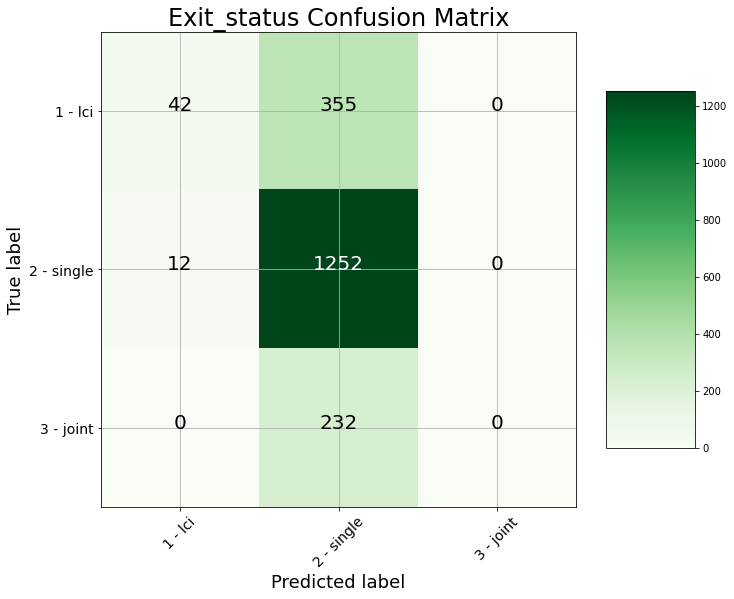

In [ ]:
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt), 
             fontsize = 20,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Let's plot it out
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['1 - lci', '2 - single', '3 - joint'],
                      title = 'Exit_status Confusion Matrix')

In [ ]:
print(rf_classifier.feature_importances_)
print(f" There are {len(rf_classifier.feature_importances_)} features in total")


[3.27226657e-03 1.33756340e-03 6.20369335e-04 2.95911099e-04
 2.00272580e-04 6.25147287e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.74279024e-03 1.78977469e-03 2.66798835e-03
 7.93507697e-03 9.78855549e-03 0.00000000e+00 1.52983975e-03
 5.34639009e-05 2.53922048e-04 7.49311290e-03 6.60440281e-02
 3.37964179e-02 9.29259099e-03 5.02530543e-03 5.27030174e-03
 3.05196281e-02 1.06623988e-02 0.00000000e+00 0.00000000e+00
 7.36398436e-02 9.94818034e-02 3.54197316e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.28934276e-03
 1.82336820e-03 1.40787211e-03 1.64973901e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.61123919e-04
 0.00000000e+00 1.49440817e-03 1.63866161e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.91660415e-02 2.43837192e-02 9.69033854e-03 2.47790410e-02
 2.24490224e-02 1.711593

In [ ]:
def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X_train, features_to_encode)

In [ ]:
feature_importances = list(zip(X_train_encoded, rf_classifier.feature_importances_))
# Then sort the feature importances by most important first
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];

Feature: Employment_Status_R                 Importance: 0.0994818033678844
Feature: Employment_Status_P                 Importance: 0.0736398435519821
Feature: Marital_Status_M                    Importance: 0.06604402813801666
Feature: Income_Range                        Importance: 0.06574303015827765
Feature: Age                                 Importance: 0.059830084775566214
Feature: Marital_Status_S                    Importance: 0.03379641791194327
Feature: Employment_Status_D                 Importance: 0.030519628090104327
Feature: Outstanding_Mortgage_Bal            Importance: 0.029903396007954695
Feature: Total_Outstanding_Balances          Importance: 0.02929946644761601
Feature: Bureau_Data___Monthly_Other_Co_R    Importance: 0.02644056349528535
Feature: Value_of_Property                   Importance: 0.026351311892397002
Feature: Total_value__CAIS_8_9s              Importance: 0.02588510563662976
Feature: Total_outstanding_balance___excl    Importance: 0.024832404759279

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


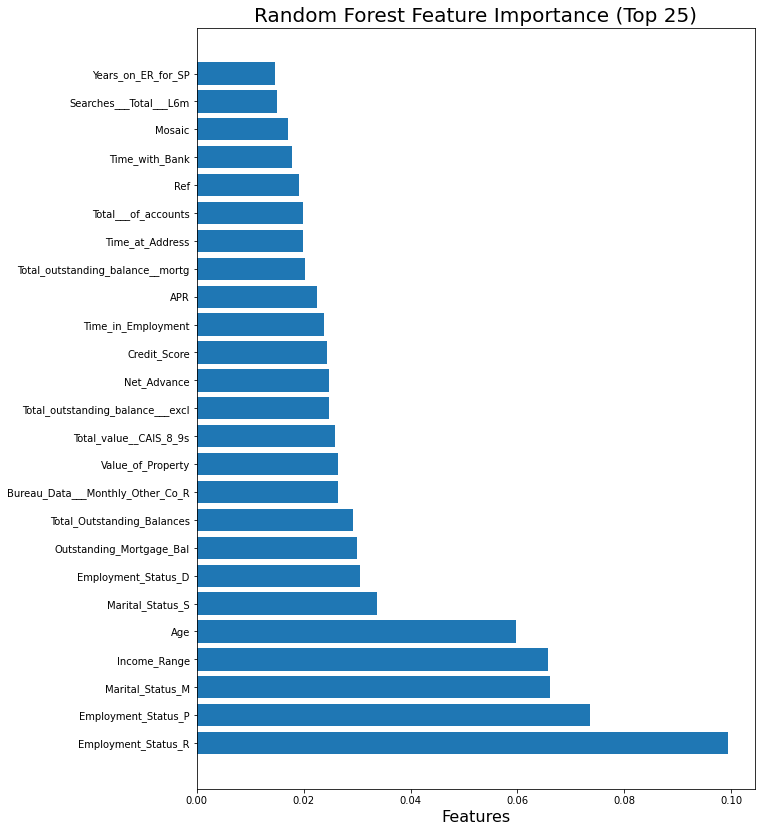

In [ ]:
# Plot the top 25 feature importance
feature_names_25 = [i[0] for i in feature_importances_ranked[:25]]
y_ticks = np.arange(0, len(feature_names_25))
x_axis = [i[1] for i in feature_importances_ranked[:25]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_25, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 25)',
          fontdict= {'fontname':'Comic Sans MS','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()